In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('Gmonthly.csv')

In [3]:
df


,Datetime,AvgPrice,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Lag1,Lag2,Lag3
0,2011-01-31,3962.552632,2.105263,1.0,1.0,105.842105,16.894737,16.894737,2.684211,207.263158,209.578947,184.210526
1,2011-02-28,3891.525000,2.000000,1.0,2.0,0.000000,44.900000,13.900000,6.700000,8.250000,3.650000,28.375000
2,2011-03-31,4202.913043,2.000000,1.0,3.0,0.000000,75.000000,16.000000,11.000000,-9.913043,-2.391304,6.326087
3,2011-04-30,4351.722222,1.944444,2.0,4.0,0.000000,105.666667,15.666667,15.388889,31.277778,32.611111,23.333333
4,2011-05-31,4739.590909,1.863636,2.0,5.0,0.000000,135.954545,15.954545,19.727273,25.340909,16.500000,10.204545
...,...,...,...,...,...,...,...,...,...,...,...,...
153,2023-10-31,9300.595238,2.380952,4.0,10.0,0.000000,289.714286,16.714286,667.857143,-2.571429,39.023810,-64.690476
154,2023-11-30,8236.173913,2.391304,4.0,11.0,0.000000,319.391304,15.391304,672.086957,-50.347826,2.304348,18.934783
155,2023-12-31,8350.583333,2.666667,4.0,12.0,0.000000,350.000000,16.000000,676.500000,14.666667,-23.875000,-50.479167
156,2024-01-31,8331.052632,2.315789,1.0,1.0,0.052632,15.842105,15.842105,680.894737,-69.157895,9.105263,154.263158


In [4]:
df.columns

Index(['Datetime', 'AvgPrice', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear', 'Lag1', 'Lag2', 'Lag3'],
      dtype='object')

In [5]:
#df = df[['AvgPrice', 'Datetime']]

In [6]:
df.head()

,Datetime,AvgPrice,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Lag1,Lag2,Lag3
0,2011-01-31,3962.552632,2.105263,1.0,1.0,105.842105,16.894737,16.894737,2.684211,207.263158,209.578947,184.210526
1,2011-02-28,3891.525000,2.000000,1.0,2.0,0.000000,44.900000,13.900000,6.700000,8.250000,3.650000,28.375000
2,2011-03-31,4202.913043,2.000000,1.0,3.0,0.000000,75.000000,16.000000,11.000000,-9.913043,-2.391304,6.326087
3,2011-04-30,4351.722222,1.944444,2.0,4.0,0.000000,105.666667,15.666667,15.388889,31.277778,32.611111,23.333333
4,2011-05-31,4739.590909,1.863636,2.0,5.0,0.000000,135.954545,15.954545,19.727273,25.340909,16.500000,10.204545


In [7]:
df = df[['Datetime', 'AvgPrice']]

In [8]:
df.loc[:, 'Datetime'] = pd.to_datetime(df['Datetime'])

In [9]:
df.head()

,Datetime,AvgPrice
0,2011-01-31 00:00:00,3962.552632
1,2011-02-28 00:00:00,3891.525000
2,2011-03-31 00:00:00,4202.913043
3,2011-04-30 00:00:00,4351.722222
4,2011-05-31 00:00:00,4739.590909


In [10]:
df_sorted = df.copy()
df_sorted.sort_values(by='Datetime', inplace=True)

In [11]:
df.update(df_sorted)

In [12]:
df.head()

,Datetime,AvgPrice
0,2011-01-31 00:00:00,3962.552632
1,2011-02-28 00:00:00,3891.525000
2,2011-03-31 00:00:00,4202.913043
3,2011-04-30 00:00:00,4351.722222
4,2011-05-31 00:00:00,4739.590909


In [13]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [14]:
df.head()

,AvgPrice
Datetime,
2011-01-31,3962.552632
2011-02-28,3891.525000
2011-03-31,4202.913043
2011-04-30,4351.722222
2011-05-31,4739.590909


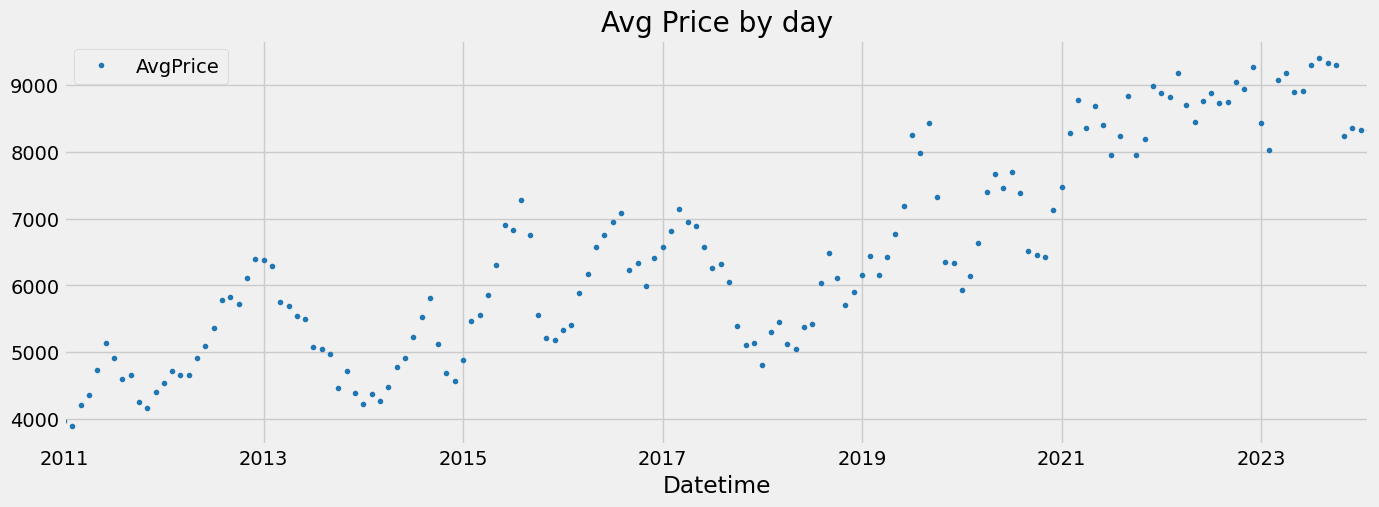

In [15]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Avg Price by day')
plt.show()

In [16]:
# 1 Outlier Analysis and removal

<Axes: ylabel='Frequency'>

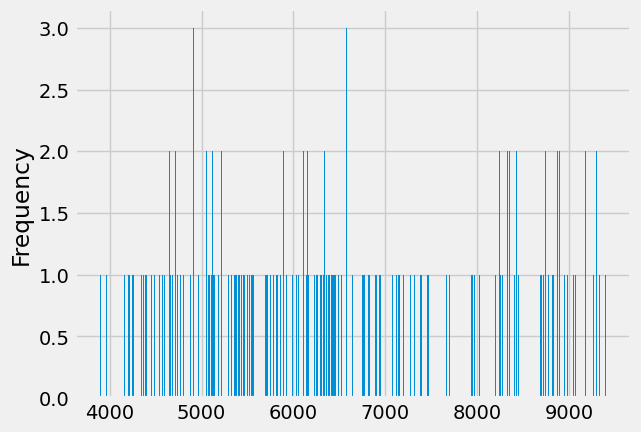

In [17]:
df['AvgPrice'].plot(kind='hist', bins=500)

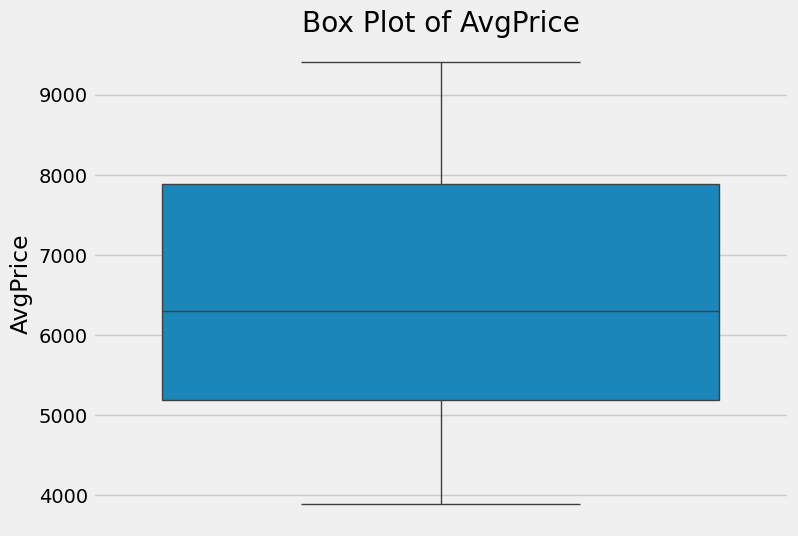

In [18]:
# Method 1: Box Plot for 'AvgPrice'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['AvgPrice'])
plt.title('Box Plot of AvgPrice')
plt.show()

In [19]:
# boxplot shows no outliers

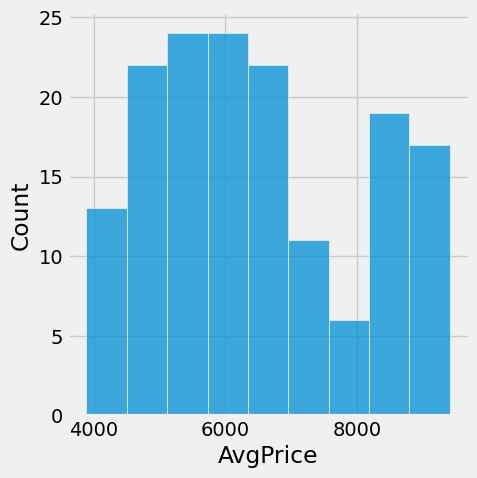

In [20]:
sns.displot(df['AvgPrice']); # distribution plot

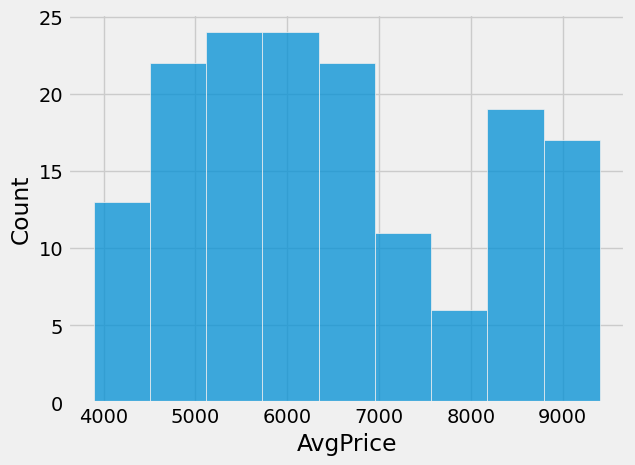

In [21]:
sns.histplot(df['AvgPrice']);

In [22]:
print("skewness: %f" % df['AvgPrice'].skew()) #calculating Skewness
print("Kurtosis: %f" % df['AvgPrice'].kurt()) #calculating Kurtosis

skewness: 0.340573
Kurtosis: -1.053958


In [23]:
df.head()

,AvgPrice
Datetime,
2011-01-31,3962.552632
2011-02-28,3891.525000
2011-03-31,4202.913043
2011-04-30,4351.722222
2011-05-31,4739.590909


In [24]:
df.tail()

,AvgPrice
Datetime,
2023-10-31,9300.595238
2023-11-30,8236.173913
2023-12-31,8350.583333
2024-01-31,8331.052632
2024-02-29,8331.159091


In [25]:
import datetime
import pandas as pd

# Define the start and end dates
start_date = datetime.date(2011, 1, 31)
end_date = datetime.date(2024, 2, 29)

# Generate monthly date range
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Calculate the total number of months
total_months = len(date_range)

# Calculate the number of months for training (80%)
train_months = int(total_months * 0.8)

# Calculate the split date by adding the number of training months to the start date
split_date = date_range[train_months]

print("Split date for 80:20 train-test split (monthly):", split_date)


Split date for 80:20 train-test split (monthly): 2021-07-31 00:00:00


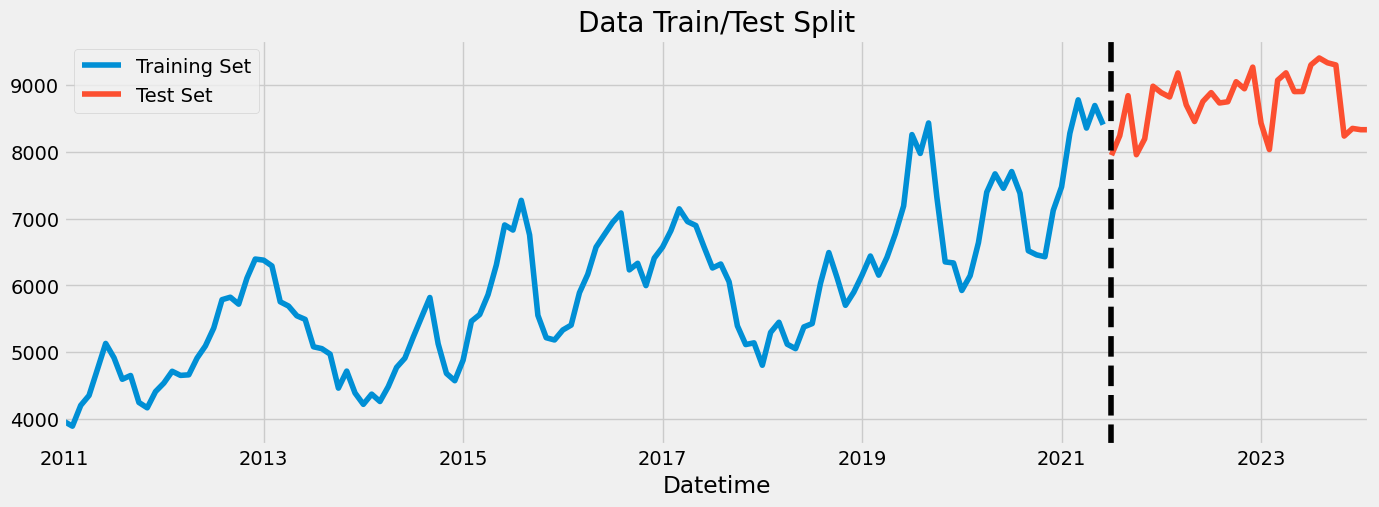

In [26]:
train = df.loc[df.index < '2021-07-31']
test = df.loc[df.index >= '2021-07-31']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2021-07-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

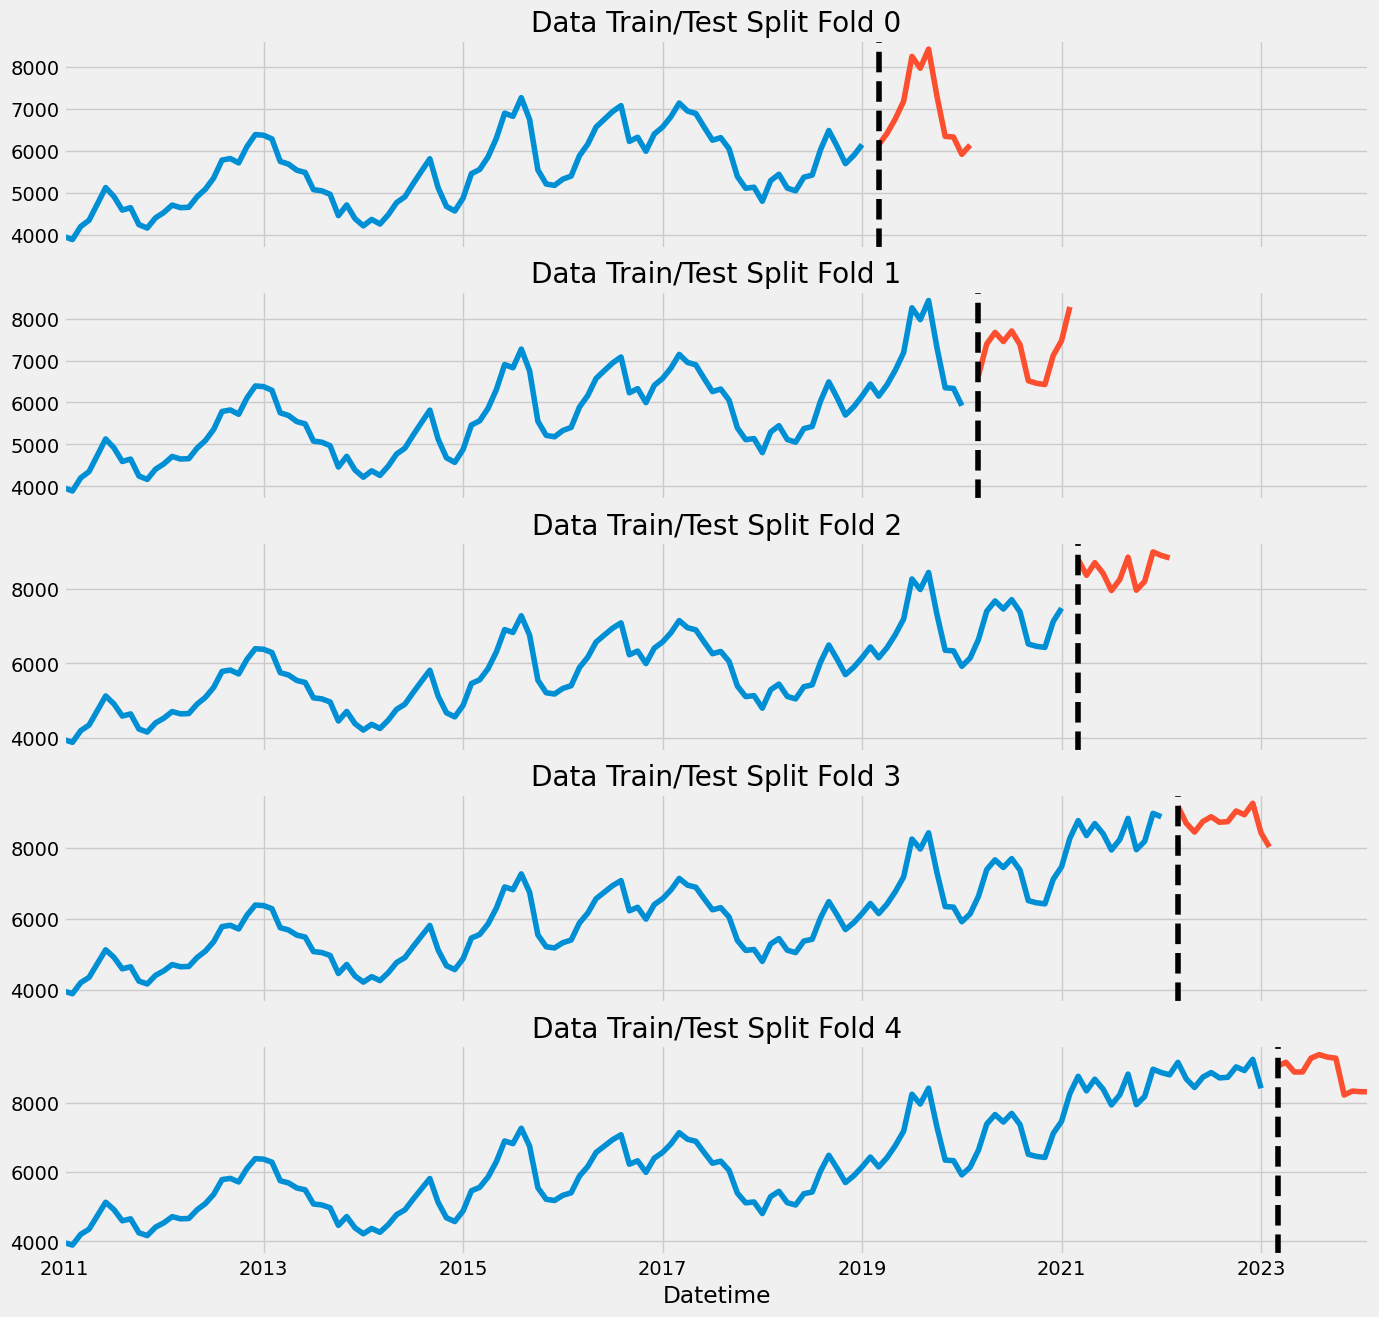

In [27]:
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

tss = TimeSeriesSplit(n_splits=5, test_size=12, gap=1)  # 1 month for test, 1 month gap
df = df.sort_index()

fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['AvgPrice'].plot(ax=axs[fold],
                           label='Training Set',
                           title=f'Data Train/Test Split Fold {fold}')
    test['AvgPrice'].plot(ax=axs[fold],
                          label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [28]:
def create_features(df):
    """
    Create time series features based on time series index within the specified test size.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    # Ensure that 'weekofyear' is computed within the test window
    df['weekofyear'] = (df.index - df.index[0]).days // 7 + 1  # Compute week of the year relative to the start of the data
    return df

df = create_features(df)

In [29]:
def add_lags(df):
    """
    Add lag features to the DataFrame based on the specified lag offsets.
    """
    target_map = df['AvgPrice'].to_dict()
    lag_offsets = [30 * i for i in range(1, 4)]  # Lag offsets in days: 30, 60, 90 (for 1, 2, 3 months)
    for lag, offset in enumerate(lag_offsets, start=1):
        df[f'lag{lag}'] = df.index - pd.Timedelta(days=offset)
        df[f'lag{lag}'] = df[f'lag{lag}'].map(target_map)
    return df


In [30]:
df = add_lags(df)

In [31]:
# training using cross validation

In [32]:
df.head()

,AvgPrice,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Datetime,,,,,,,,,,,
2011-01-31,3962.552632,0,1,1,2011,31,31,1,NaN,NaN,NaN
2011-02-28,3891.525000,0,1,2,2011,59,28,5,NaN,NaN,NaN
2011-03-31,4202.913043,3,1,3,2011,90,31,9,NaN,NaN,NaN
2011-04-30,4351.722222,5,2,4,2011,120,30,13,4202.913043,NaN,NaN
2011-05-31,4739.590909,1,2,5,2011,151,31,18,NaN,NaN,NaN


In [33]:
tss = TimeSeriesSplit(n_splits=5, test_size=12, gap=1)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear',  'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'AvgPrice'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:squarederror',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:5513.88603	validation_1-rmse:6935.92702
[100]	validation_0-rmse:2143.92757	validation_1-rmse:3294.89187
[200]	validation_0-rmse:945.61705	validation_1-rmse:2029.27954
[300]	validation_0-rmse:544.77067	validation_1-rmse:1575.53008
[400]	validation_0-rmse:423.62909	validation_1-rmse:1386.22993
[500]	validation_0-rmse:380.92813	validation_1-rmse:1335.26951
[600]	validation_0-rmse:355.66568	validation_1-rmse:1224.92717
[700]	validation_0-rmse:338.11510	validation_1-rmse:1127.76866
[800]	validation_0-rmse:323.39927	validation_1-rmse:1063.13782
[900]	validation_0-rmse:311.35343	validation_1-rmse:1017.60069
[999]	validation_0-rmse:301.42360	validation_1-rmse:977.72832
[0]	validation_0-rmse:5689.05045	validation_1-rmse:7170.70341
[100]	validation_0-rmse:2221.54256	validation_1-rmse:3299.93594
[200]	validation_0-rmse:992.84414	validation_1-rmse:1639.25351
[300]	validation_0-rmse:570.04851	validation_1-rmse:1103.57285
[400]	validation_0-rmse:438.36892	validation_1-rmse:959.

In [34]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 782.6403
Fold scores:[977.7283376295828, 914.6160109481629, 1105.9572816738535, 491.4446904180474, 423.45528651535]


In [35]:
# Retrain on all data
df = create_features(df)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'AvgPrice'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=300,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=500)

[0]	validation_0-rmse:6594.34940
[299]	validation_0-rmse:580.32606


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
df.index.max()

Timestamp('2024-02-29 00:00:00')

In [37]:
future = pd.date_range('2024-02-29 ','2025-04-30', freq='M')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [38]:
future_w_features = df_and_future.query('isFuture').copy()

In [39]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

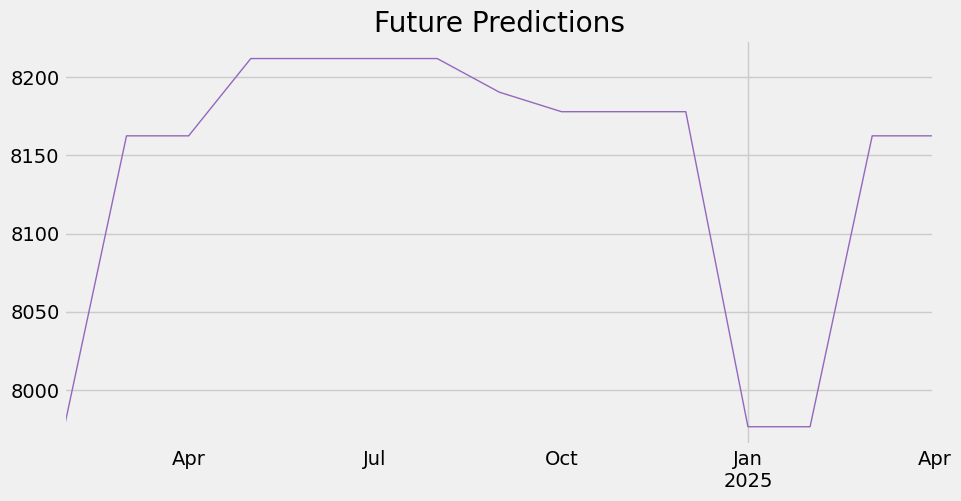

In [40]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

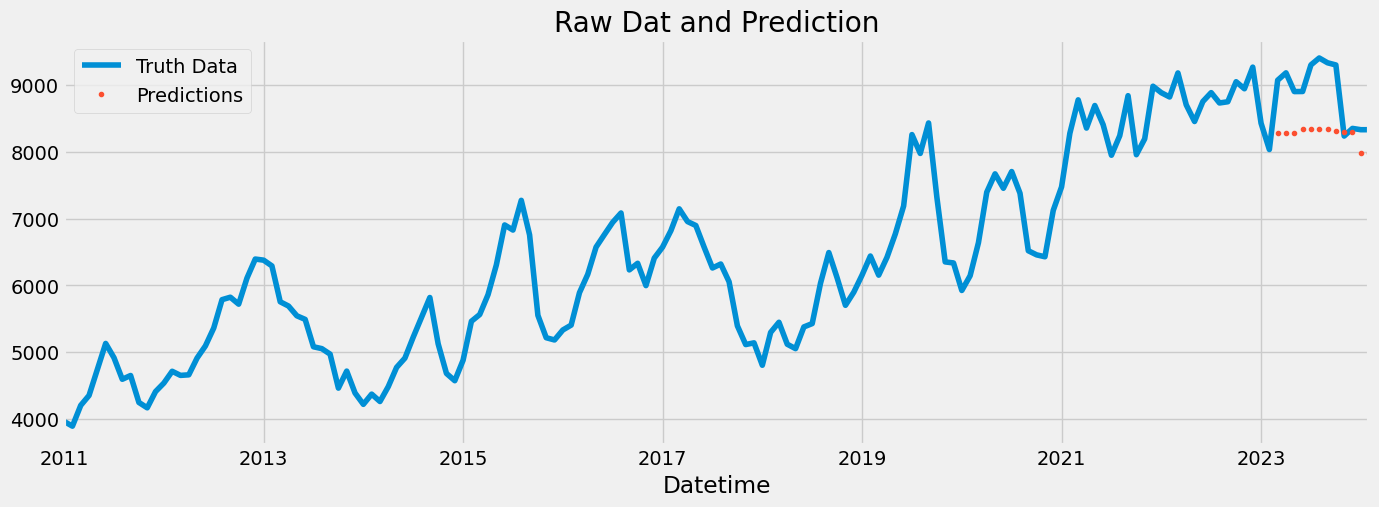

In [41]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['AvgPrice']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [42]:
score = np.sqrt(mean_squared_error(test['AvgPrice'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 729.44


In [43]:
def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    
    Parameters:
        y_true (array-like): Array of true values.
        y_pred (array-like): Array of predicted values.
        
    Returns:
        float: MAPE value.
    """
    assert len(y_true) == len(y_pred), "Lengths of true and predicted values must be equal."
    n = len(y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Calculate MAPE
mape = calculate_mape(test['AvgPrice'], test['prediction'])
print(f'MAPE Score on Test set: {mape:0.2f}%')

MAPE Score on Test set: 7.03%


In [44]:
# Assuming you have already generated predictions for future dates and stored them in 'future_w_features' DataFrame

# Step 1: Extract relevant columns (date and predictions)
predictions_df = future_w_features[['pred']]

# Step 2: Save predictions to a CSV file
predictions_df.to_csv('MNGround_pred.csv')

In [45]:
reg.save_model('MPrice_pred_coco.json')